# Using Data Samples in ML: K-Fold Cross Validation 

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [3]:
digits_features_df = pd.DataFrame(digits.data, columns=digits.feature_names)
digits_features_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
digits_target_df = pd.DataFrame(digits.target,columns=['digit'])
digits_target_df.head()

,digit
0,0
1,1
2,2
3,3
4,4


### Using All Samples for Training

In [5]:
model = SVC()
model.fit(digits_features_df, digits_target_df)
model.score(digits_features_df.head(5),digits_target_df.head(5))

C:\Users\Saumyanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [6]:
model.predict([digits_features_df.loc[5]])

C:\Users\Saumyanti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([9])

In [8]:
digits_target_df.loc[5]

digit    5
Name: 5, dtype: int32

<Figure size 640x480 with 0 Axes>

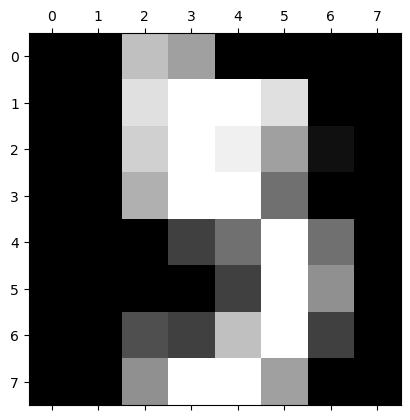

In [7]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[5])
plt.show()

### Using Separate Training and Test Dataset

In [19]:
from sklearn.model_selection import train_test_split
x_trin, x_test, y_train, y_test = train_test_split(digits_features_df,digits_target_df, test_size=0.3,shuffle=True)

In [20]:
model = SVC()
model.fit(x_trin, y_train)
model.score(x_test,y_test)

C:\Users\Saumyanti\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9833333333333333

### Using K-Fold 

In [21]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)

In [22]:
sum = 0
for train_index,test_index in kfold.split(digits.data):
    x_train, x_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                        digits.target[train_index], digits.target[test_index]
    model = SVC()
    model.fit(x_train, y_train)
    print(model.score(x_test,y_test))
    sum += model.score(x_test,y_test)

print(f'Average Score: {sum/10}')

0.9444444444444444
1.0
0.9333333333333333
0.9833333333333333
0.9833333333333333
0.9888888888888889
0.9888888888888889
0.994413407821229
0.9664804469273743
0.9497206703910615
Average Score: 0.9732836747361887


### Using Cross Val Score

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(SVC(), digits.data, digits.target, cv=15)

array([0.925     , 0.99166667, 0.98333333, 0.99166667, 0.975     ,
       1.        , 0.98333333, 0.98333333, 1.        , 0.98333333,
       1.        , 0.99166667, 0.99159664, 0.93277311, 0.95798319])

In [ ]:
import numpy as np

np.mean(cross_val_score(SVC(), digits.data, digits.target, cv=15))